In [2]:
# Para processar arquivos e imagens
from PIL import Image
import os
import numpy as np

# Para plotar imagens
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import KMeans


In [3]:
# Carregando as imagens

img_G = mpimg.imread('data/mdb001.pgm')
img_D = mpimg.imread('data/mdb003.pgm')
img_F = mpimg.imread('data/mdb005.pgm')



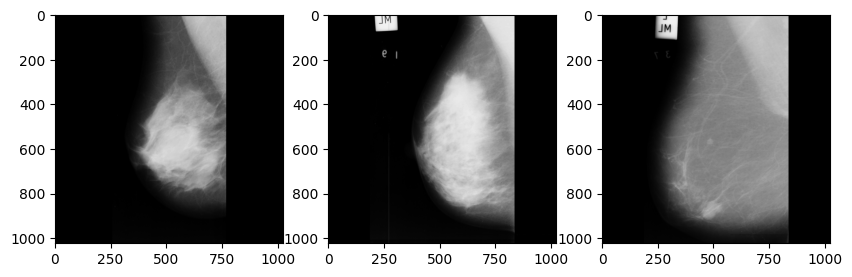

In [4]:
# Plotando as imagens

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [6]:
# Essa função usa o Kmeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1, 1))
    kmeans = KMeans(n_clusters=clusters, random_state=0, n_init=5)
    kmeans.fit(vectorized)

    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]

    segmented_data = segmented_data.reshape((img.shape))
    return(segmented_data)

In [7]:
clusters = 3

img_G_segmentada = filtro_kmeans(img_G, clusters)
img_D_segmentada = filtro_kmeans(img_D, clusters)
img_F_segmentada = filtro_kmeans(img_F, clusters)

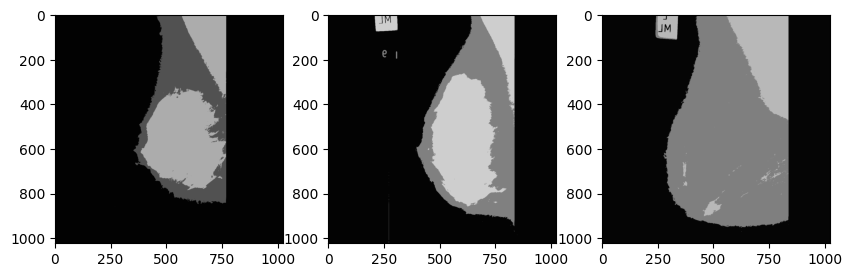

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
im1 = axs[0].imshow(img_G_segmentada, cmap='gray', vmin=0, vmax=255)   
im2 = axs[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [13]:
dados = pd.read_csv('data/caffeine.csv', sep=",")

In [14]:
dados.shape

(610, 5)

In [15]:
dados.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [16]:
set(dados['type'])


{'Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea', 'Water'}

In [17]:
dados.isnull().sum()

drink            0
Volume (ml)      0
Calories         0
Caffeine (mg)    0
type             0
dtype: int64

<Axes: xlabel='Volume (ml)', ylabel='Count'>

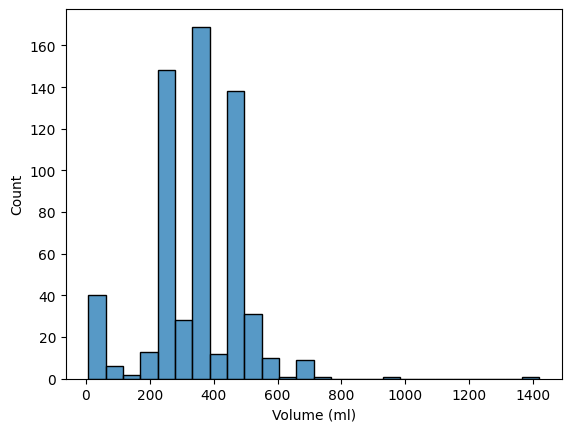

In [18]:
sb.histplot(data=dados, x="Volume (ml)")

<Axes: xlabel='Calories', ylabel='Count'>

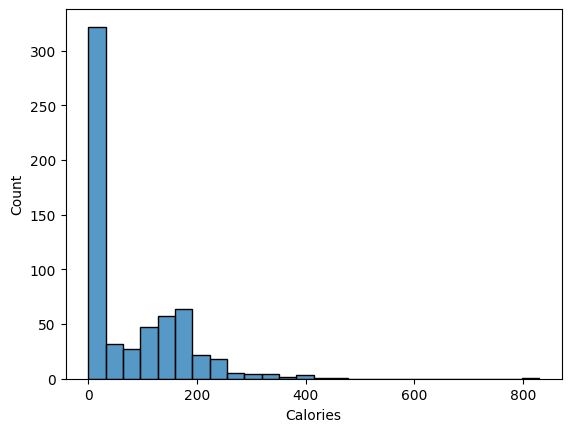

In [20]:
sb.histplot(data=dados, x="Calories")

<Axes: xlabel='Caffeine (mg)', ylabel='Count'>

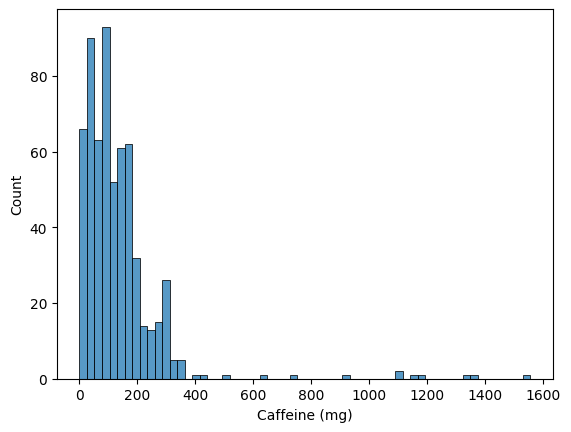

In [21]:
sb.histplot(data=dados, x="Caffeine (mg)")

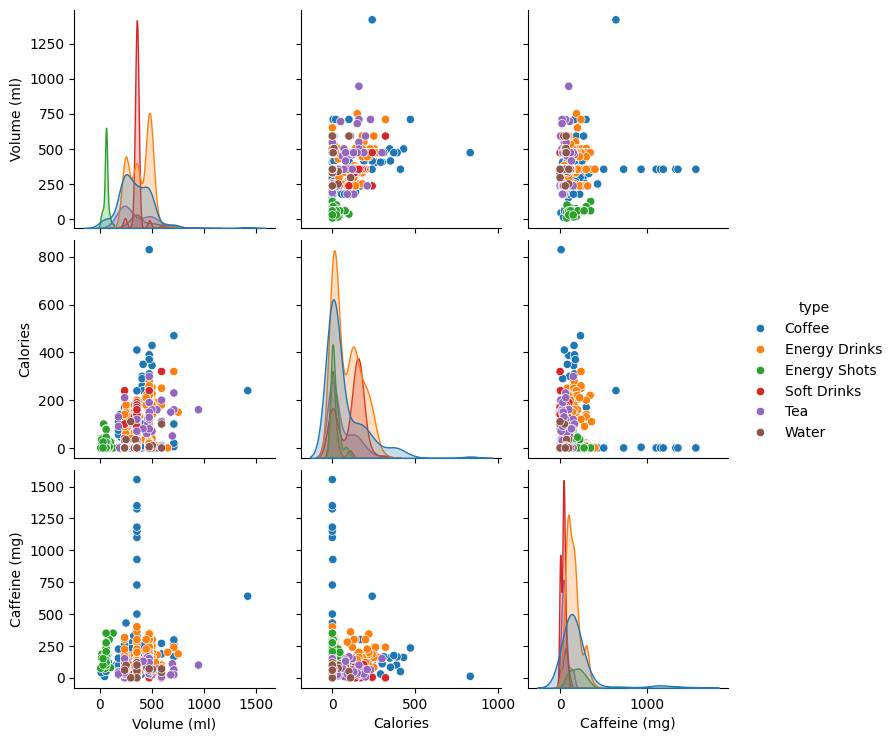

In [22]:
sb.pairplot(dados, vars=["Volume (ml)", "Calories", "Caffeine (mg)"], hue="type")

In [23]:
# Separando os dados
x = dados.drop(columns=['type', 'drink'])
y = dados['type']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [38]:
dt = DecisionTreeClassifier(random_state=7, criterion='gini', max_depth=3)

In [39]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [40]:
y_predito = dt.predict(x_test)

[Text(0.5, 0.875, 'x[2] <= 69.5\ngini = 0.756\nsamples = 488\nvalue = [133, 173, 32, 76, 59, 15]'),
 Text(0.25, 0.625, 'x[0] <= 312.74\ngini = 0.688\nsamples = 157\nvalue = [21, 10, 0, 72, 43, 11]'),
 Text(0.125, 0.375, 'x[0] <= 183.356\ngini = 0.632\nsamples = 53\nvalue = [18, 5, 0, 3, 26, 1]'),
 Text(0.0625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [6, 0, 0, 0, 1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.62\nsamples = 46\nvalue = [12, 5, 0, 3, 25, 1]'),
 Text(0.375, 0.375, 'x[0] <= 367.451\ngini = 0.521\nsamples = 104\nvalue = [3, 5, 0, 69, 17, 10]'),
 Text(0.3125, 0.125, 'gini = 0.251\nsamples = 78\nvalue = [0, 0, 0, 67, 4, 7]'),
 Text(0.4375, 0.125, 'gini = 0.68\nsamples = 26\nvalue = [3, 5, 0, 2, 13, 3]'),
 Text(0.75, 0.625, 'x[0] <= 125.687\ngini = 0.631\nsamples = 331\nvalue = [112, 163, 32, 4, 16, 4]'),
 Text(0.625, 0.375, 'x[2] <= 78.5\ngini = 0.111\nsamples = 34\nvalue = [2, 0, 32, 0, 0, 0]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 0, 1, 0, 0, 0]'),
 Text(

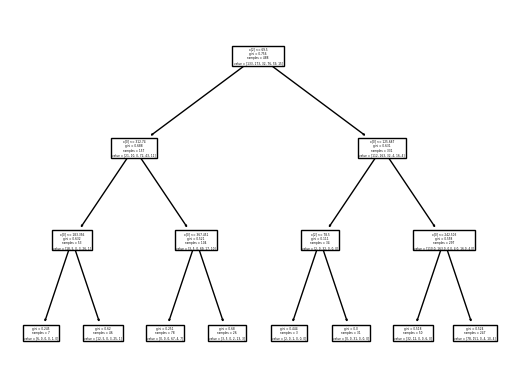

In [41]:
tree.plot_tree(dt)

In [42]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [43]:
y_predito = dt.predict(x_test)

[Text(0.5, 0.875, 'x[2] <= 69.5\ngini = 0.756\nsamples = 488\nvalue = [133, 173, 32, 76, 59, 15]'),
 Text(0.25, 0.625, 'x[0] <= 312.74\ngini = 0.688\nsamples = 157\nvalue = [21, 10, 0, 72, 43, 11]'),
 Text(0.125, 0.375, 'x[0] <= 183.356\ngini = 0.632\nsamples = 53\nvalue = [18, 5, 0, 3, 26, 1]'),
 Text(0.0625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [6, 0, 0, 0, 1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.62\nsamples = 46\nvalue = [12, 5, 0, 3, 25, 1]'),
 Text(0.375, 0.375, 'x[0] <= 367.451\ngini = 0.521\nsamples = 104\nvalue = [3, 5, 0, 69, 17, 10]'),
 Text(0.3125, 0.125, 'gini = 0.251\nsamples = 78\nvalue = [0, 0, 0, 67, 4, 7]'),
 Text(0.4375, 0.125, 'gini = 0.68\nsamples = 26\nvalue = [3, 5, 0, 2, 13, 3]'),
 Text(0.75, 0.625, 'x[0] <= 125.687\ngini = 0.631\nsamples = 331\nvalue = [112, 163, 32, 4, 16, 4]'),
 Text(0.625, 0.375, 'x[2] <= 78.5\ngini = 0.111\nsamples = 34\nvalue = [2, 0, 32, 0, 0, 0]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 0, 1, 0, 0, 0]'),
 Text(

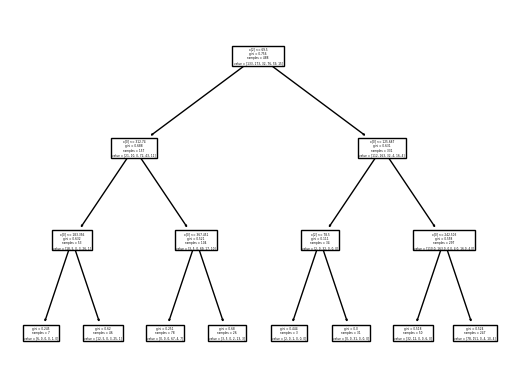

In [44]:
tree.plot_tree(dt)

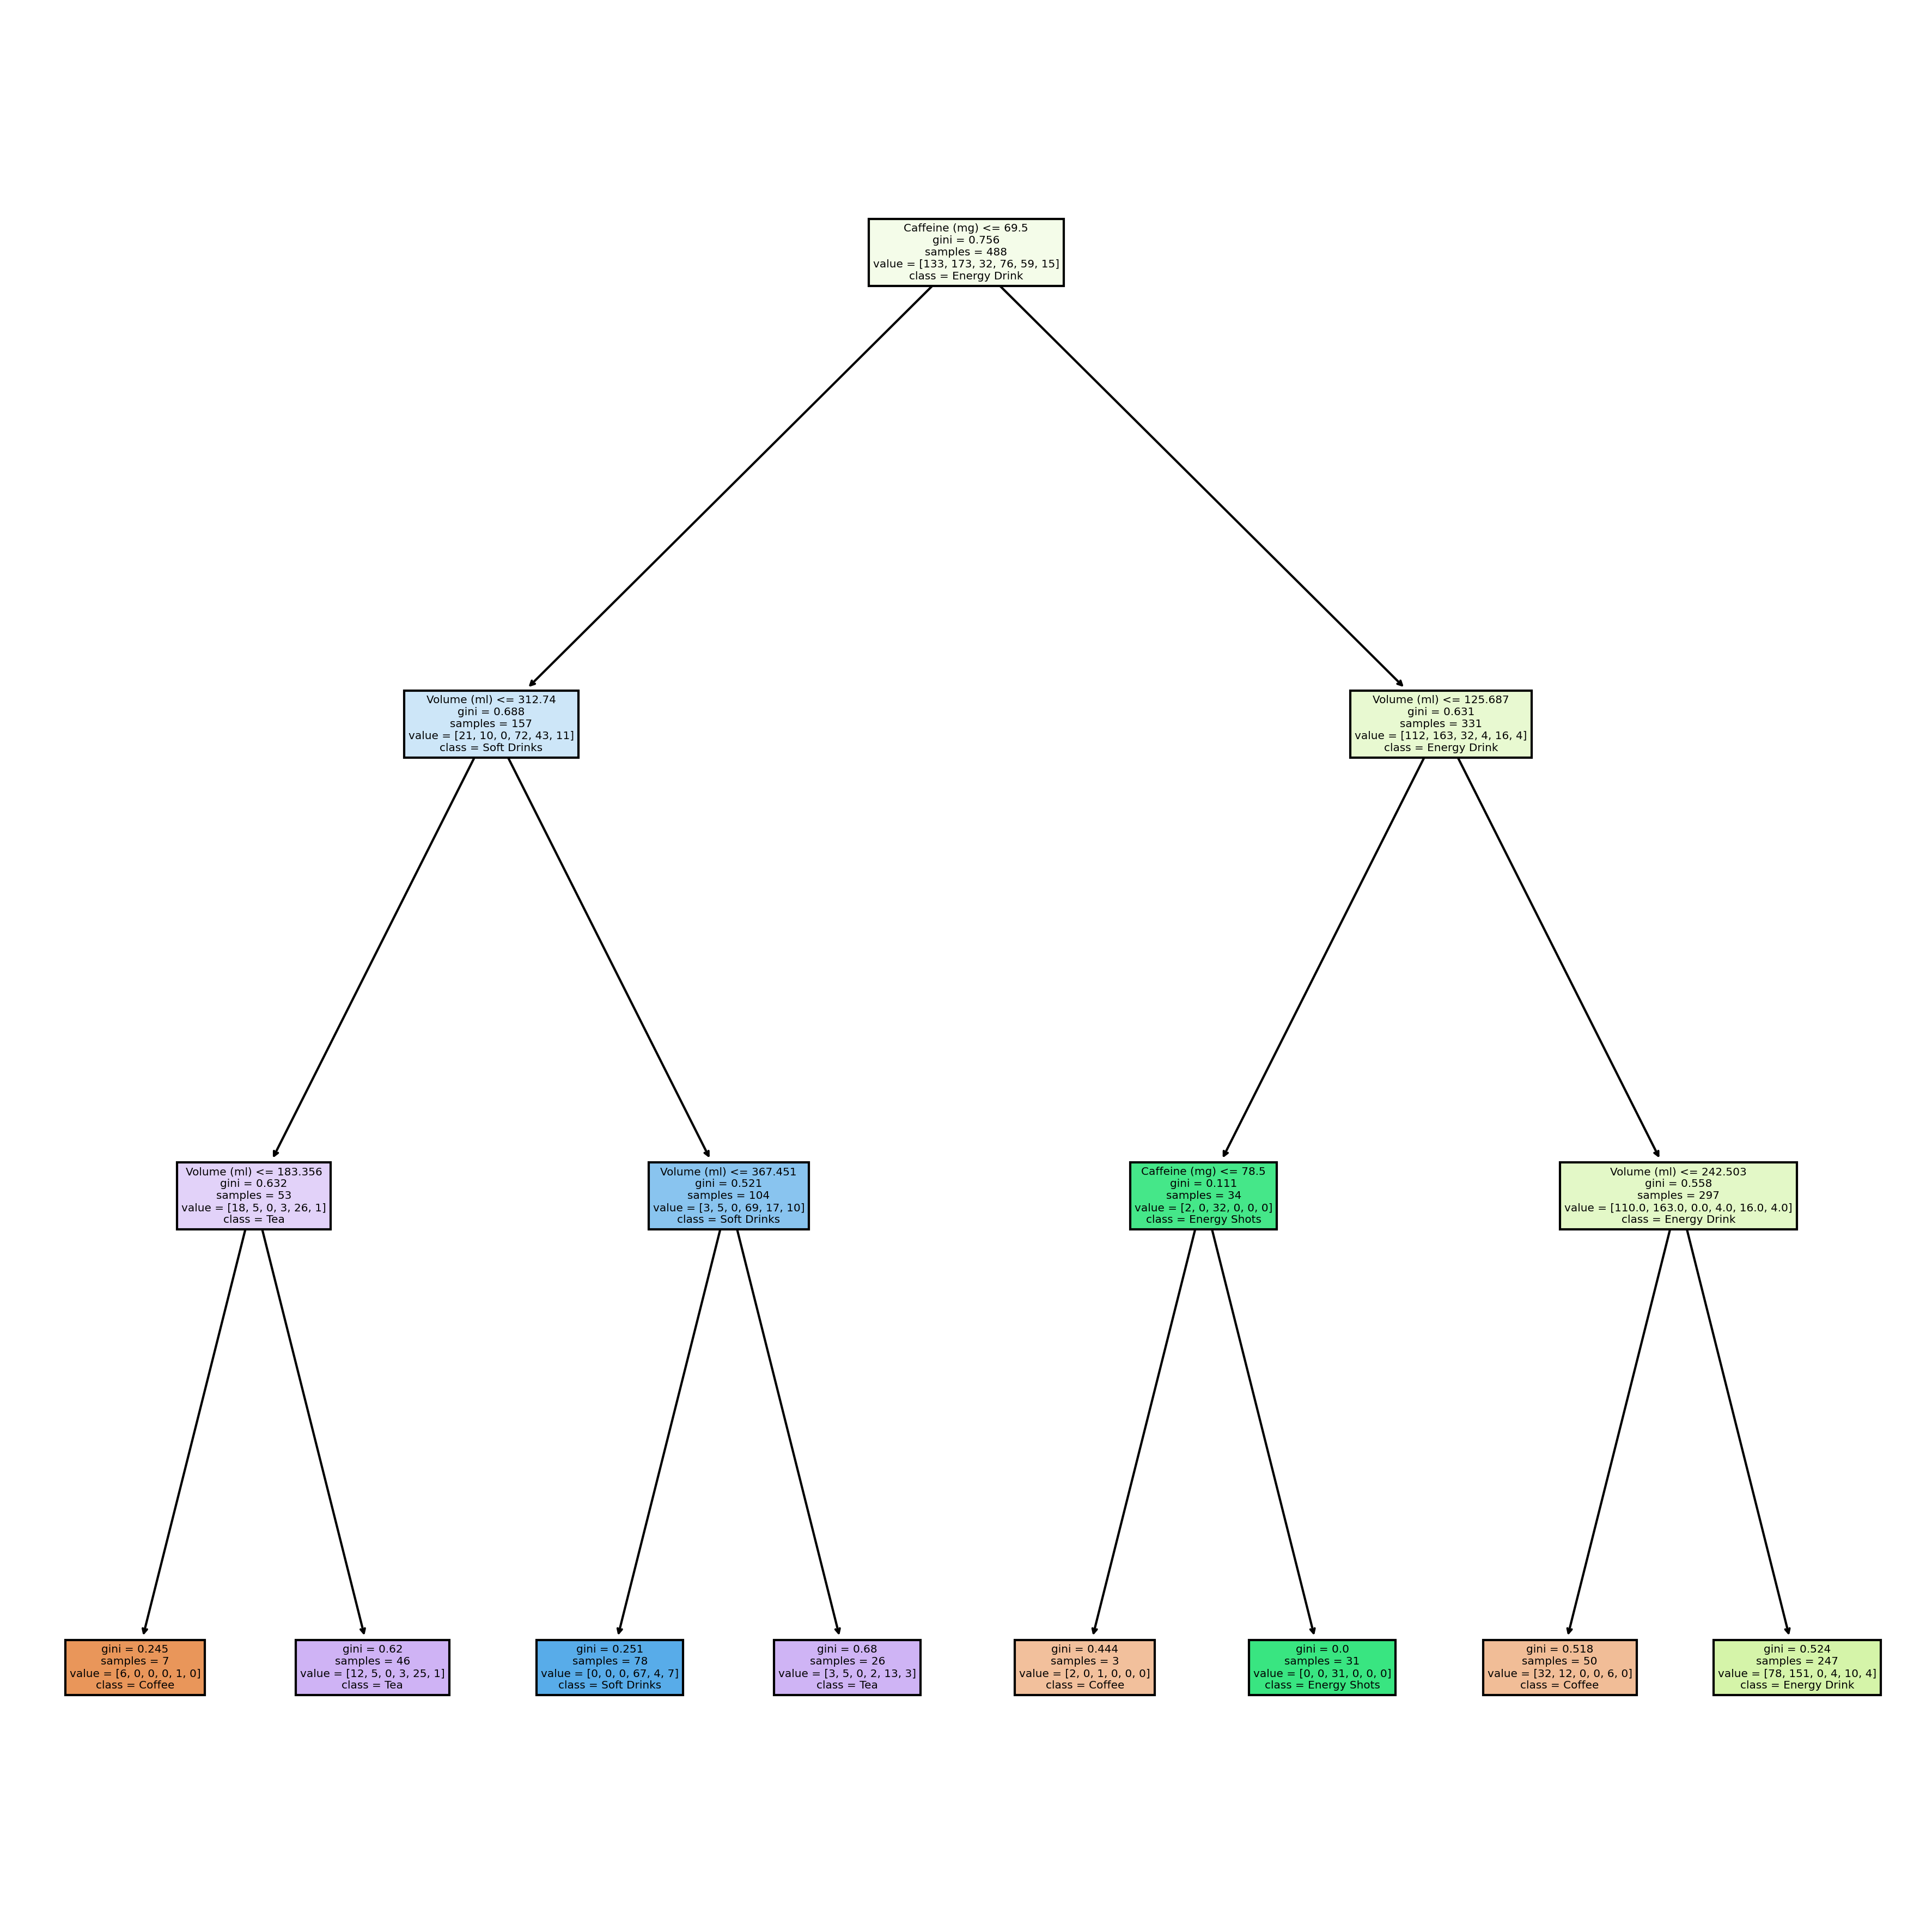

In [45]:
class_names = ['Coffee', 'Energy Drink', 'Energy Shots', 'Soft Drinks', 'Tea', 'Water']
label_names = ['Volume (ml)', 'Calories', 'Caffeine (mg)']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)

tree.plot_tree(dt, feature_names = label_names,
                class_names=class_names, 
                filled = True)
fig.savefig('imagename.png')

In [46]:
# Relatório de validação das métricas de desempenho.
print(accuracy_score(y_test, y_predito))

0.5901639344262295


In [47]:
dados['type'].value_counts()

type
Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: count, dtype: int64

In [48]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ------------------- -------------------- 122.9/258.0 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from imblearn.over_sampling import SMOTE

In [51]:
# Aplicar SMOTE para oversampling da classe minoritária
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train)

In [52]:
x_train.shape

(488, 3)

In [53]:
x_train_os.shape

(1038, 3)

In [55]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=7, class_weight='balanced')
rf.fit(x_train_os, y_train_os)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=80, random_state=7)

In [57]:
estimator_rf = rf.estimators_
y_predito_random_forest = rf.predict(x_test)
print(accuracy_score(y_test, y_predito_random_forest))

0.6557377049180327


In [58]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9672131147540983
0.6557377049180327
